# Visualization gene expression data

Previously we merged the gene expression data files of various diseases together. In this notebook we will some basic visualizations to get a better understanding of our data before we are going to integrate it with our network. In this notebook we will use the merged_data_final.txt file.

In [1]:
# get working directory
getwd()

[1] "C:/Users/Laurent/Documents/GitHub/inflammation_networks2/Jupyter - Cleaning & merging data"

In [2]:
# load in libraries
library(dplyr)
library(gplots)
library(RColorBrewer)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gplots' was built under R version 3.5.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"

In [3]:
# load in merged data file
dataset <- read.table(file.path(getwd(), "Datasets", "merged_data_final.txt"), header = T, sep = "\t")

### log Fold Change and p-value
The merged data files contains 6 diseases, and 8 datasets. It contains the following diseases: breast cancer, lung cancer, metabolically unhealthy obese, rheumatoid arthritis, cardiomyopathy and systemic lupus erythematosus.

We first start with plotting the log fold change (LogFC) and the p.value (PValue) of all datasets.

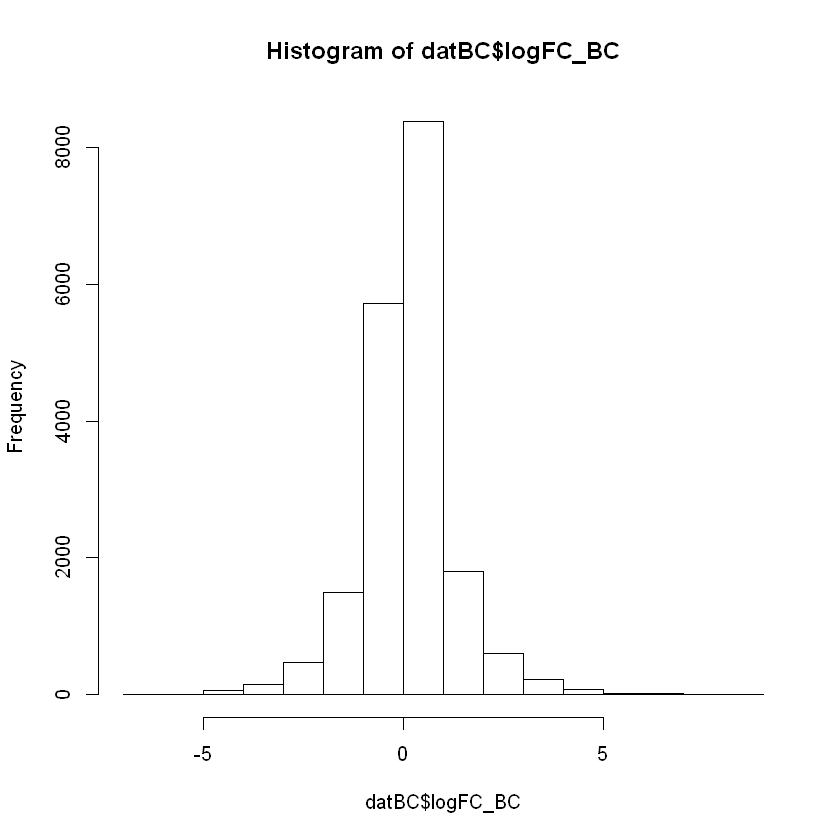

entrezgene,hgnc_symbol,logFC_BC,PValue_BC
7105,TSPAN6,-0.6346625,4.625831e-06
64102,TNMD,-4.0222475,1.661109e-30
8813,DPM1,0.3567976,6.129101e-05
57147,SCYL3,0.3033830,1.384706e-04
55732,C1orf112,1.0983553,1.738228e-28
2268,FGR,-0.3356203,8.173009e-02


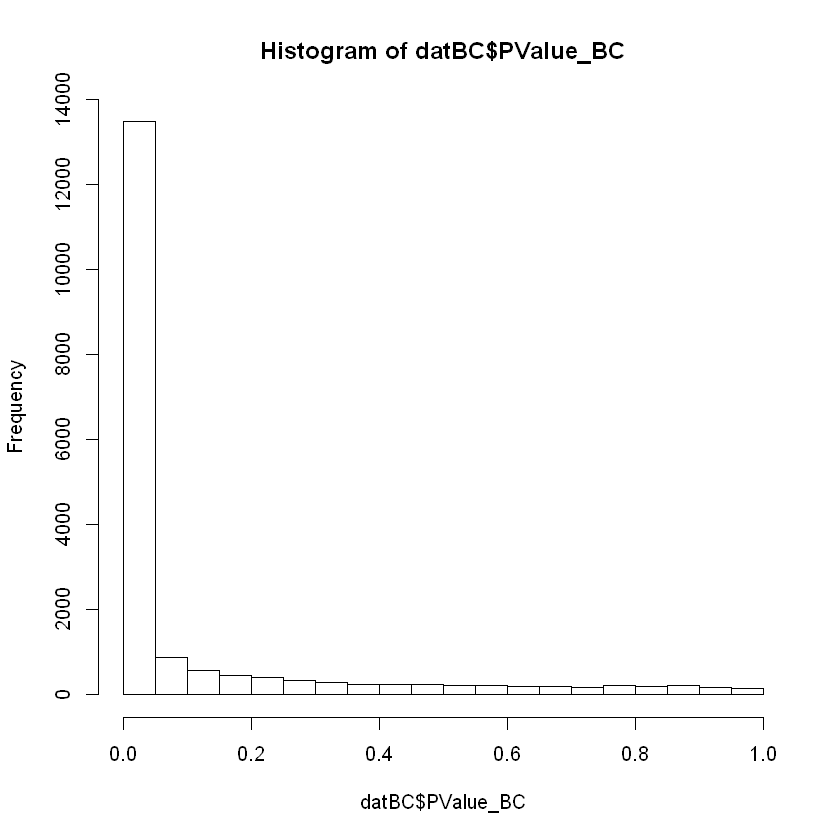

In [4]:
# breast cancer
datBC <- dataset[,-5:-10]
datBC <- na.omit(datBC)
hist(datBC$logFC_BC)
hist(datBC$PValue_BC)
head(datBC)

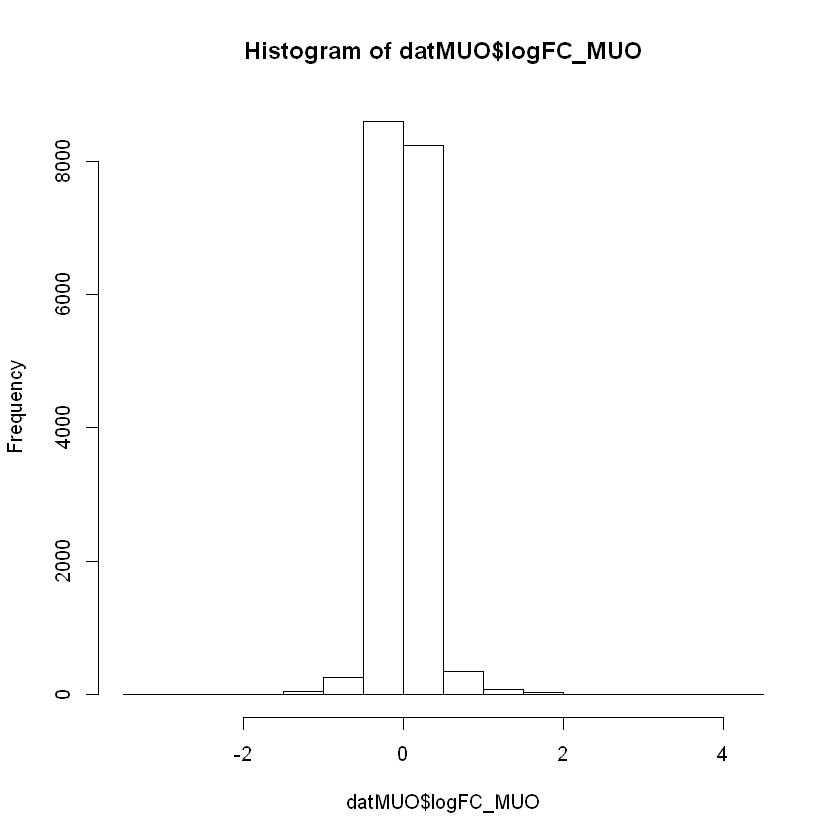

entrezgene,hgnc_symbol,logFC_MUO,PValue_MUO
7105,TSPAN6,-0.19539969,0.0754891770
64102,TNMD,1.80412948,0.0000016200
8813,DPM1,-0.40356445,0.0001569100
57147,SCYL3,-0.15488979,0.1700401430
55732,C1orf112,0.08653913,0.0135634820
2268,FGR,0.55657959,0.0000000911


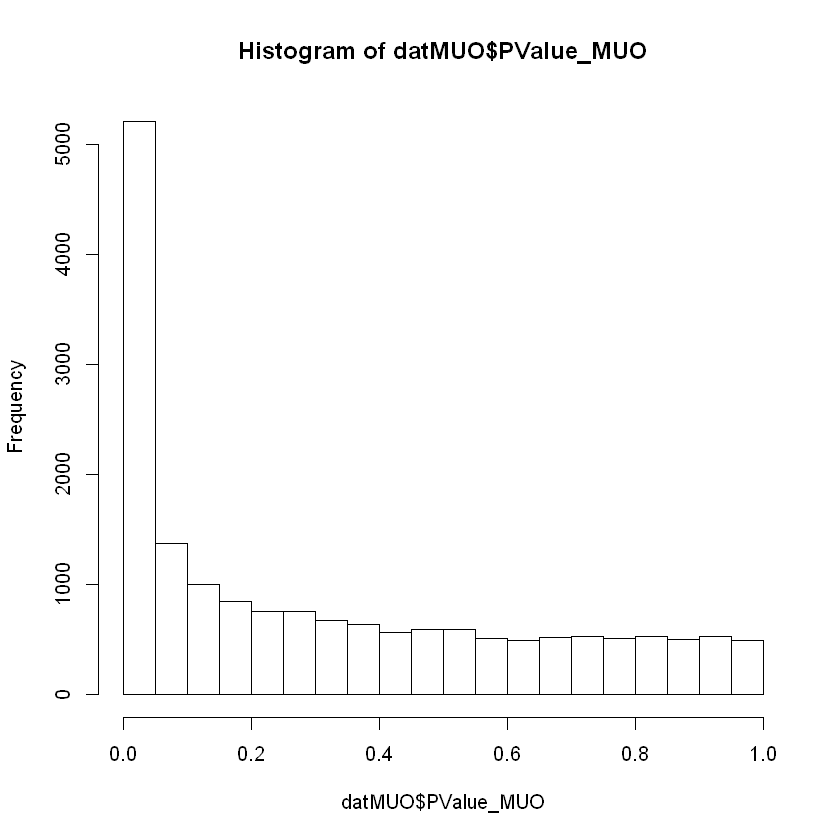

In [5]:
# metabolically unhealthy obese
datMUO <- dataset[,c(-3,-4,-7:-10)]
datMUO <- na.omit(datMUO)
hist(datMUO$logFC_MUO)
hist(datMUO$PValue_MUO)
head(datMUO)

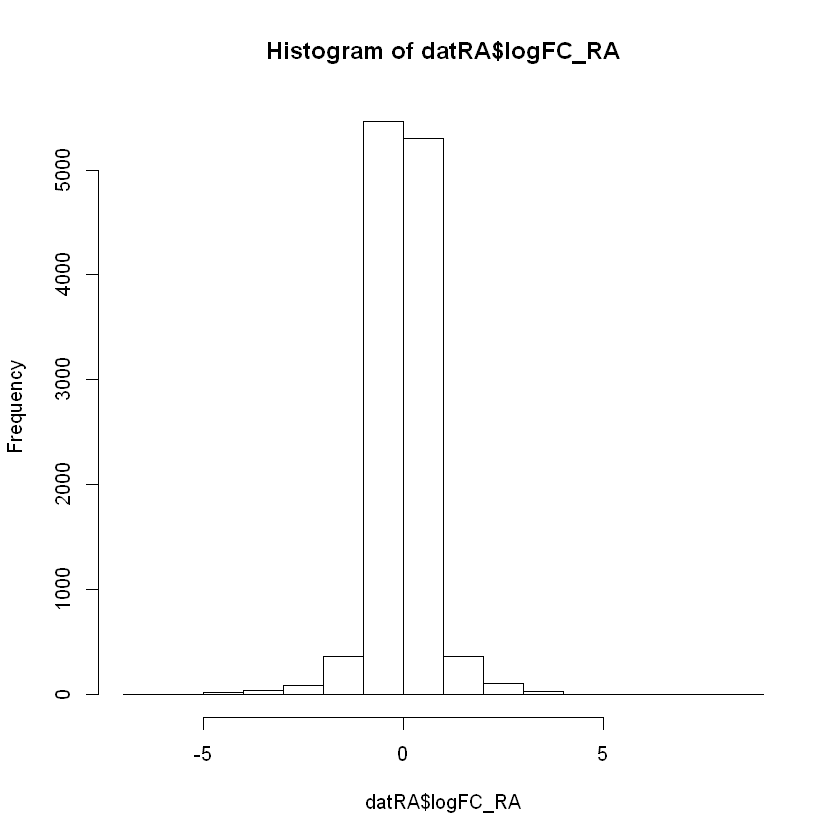

entrezgene,hgnc_symbol,logFC_RA,PValue_RA
7105,TSPAN6,-0.30046001,1.865526e-02
64102,TNMD,-0.04860816,8.196471e-01
8813,DPM1,-0.34473391,2.328536e-02
57147,SCYL3,0.08311677,4.803042e-01
55732,C1orf112,-0.21473569,3.695494e-02
2268,FGR,1.34143362,6.749178e-06


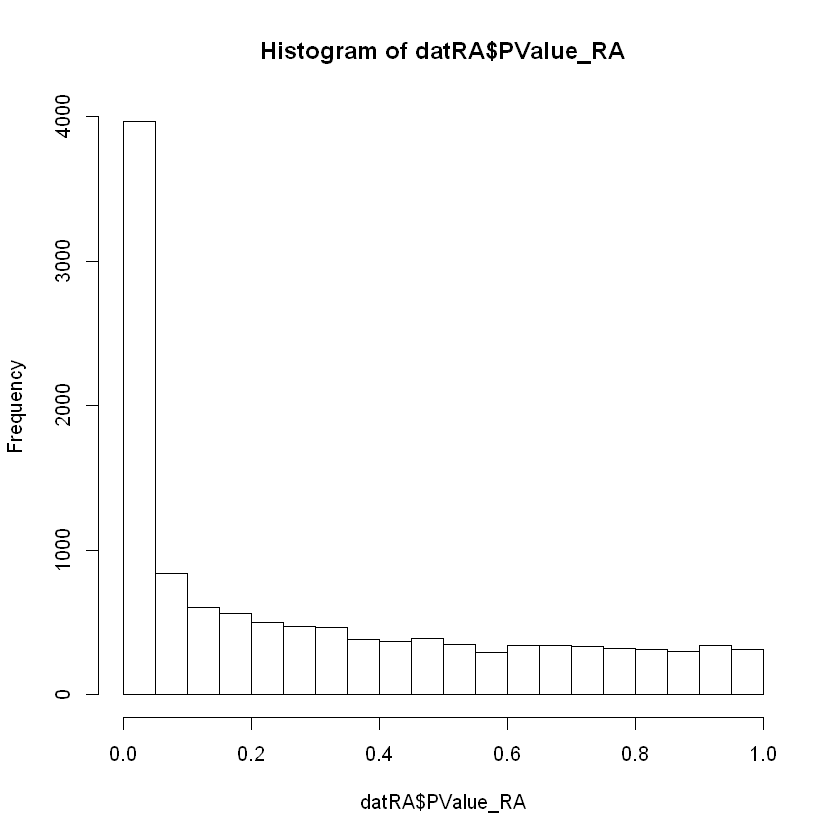

In [6]:
# rheumatoid arthritis
datRA <- dataset[,c(-3:-6,-9,-10)]
datRA <- na.omit(datRA)
hist(datRA$logFC_RA)
hist(datRA$PValue_RA)
head(datRA)

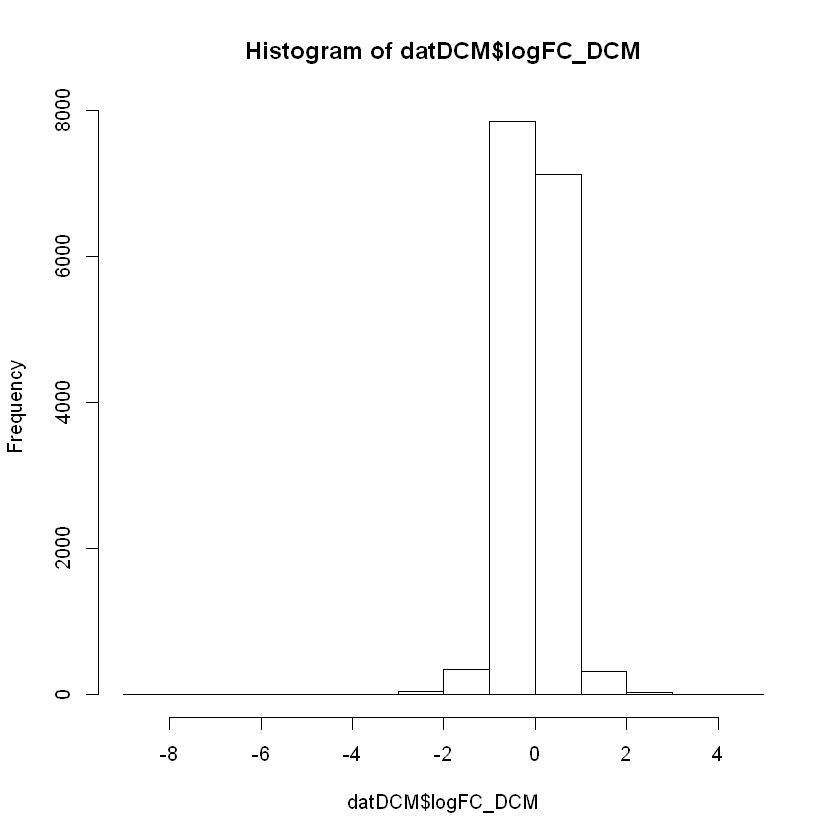

entrezgene,hgnc_symbol,logFC_DCM,PValue_DCM
7105,TSPAN6,-0.05590022,7.977584e-01
64102,TNMD,2.92402119,9.558365e-05
8813,DPM1,-0.09280415,7.007694e-01
57147,SCYL3,0.12344168,6.039372e-01
55732,C1orf112,-0.07692294,8.106303e-01
2268,FGR,-0.14915484,7.410703e-01


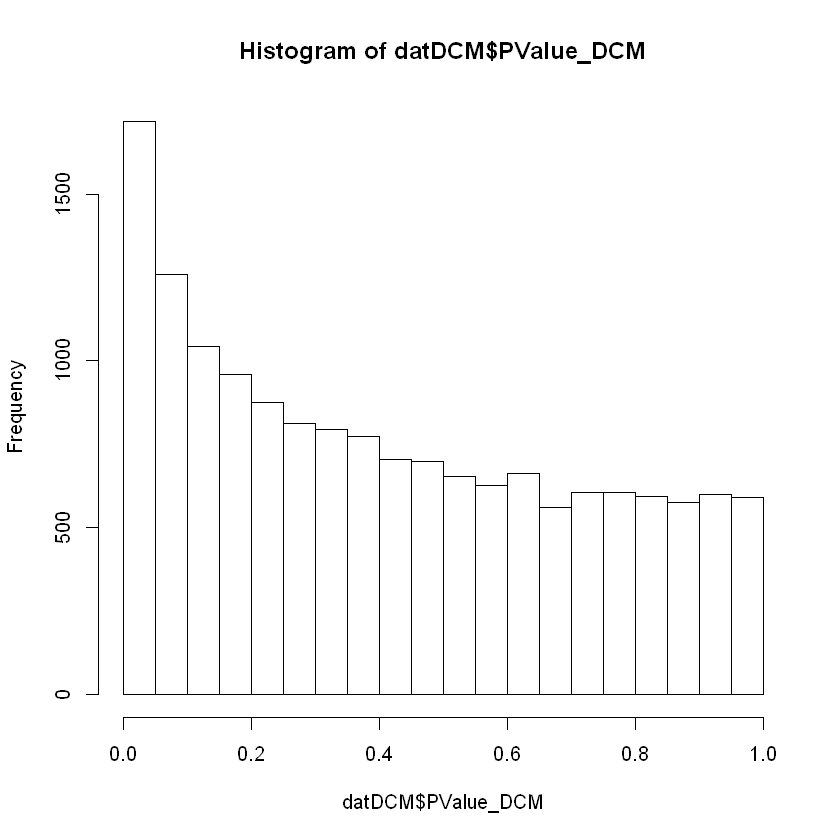

In [7]:
# DCM
datDCM <- dataset[,c(-3:-8)]
datDCM <- na.omit(datDCM)
hist(datDCM$logFC_DCM)
hist(datDCM$PValue_DCM)
head(datDCM)

For all datasets, the fold change is quite what we want to see. No datasets has high frequencies at the respective extremities. For the p.values however, we that systemic lupus erythematosus and lung cancer have a higher frequency of p.value = 1.0 compared to the other datasets and comapred to the other p.values within the dataset.

### Significant differentially expressed genes
It is interesting to see the number and percentage of significant differentially expressed genes per dataset. 

So, let us check what these values are!

In [30]:
# set the log Fold Change cutoffs and p-value
# negLogFC is the negative logFC cutoff, posLogFC is the positive logFC and pValue is the p-value.
negLogFC <- -1.00
posLogFC <- 1.00
pValue <- 0.05

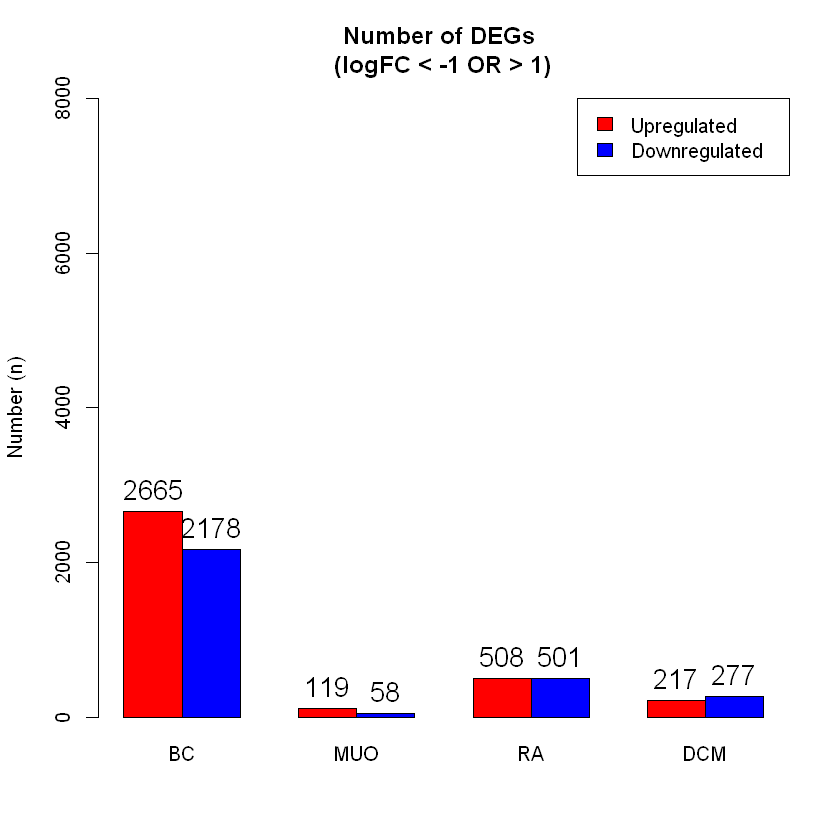

png 
  2

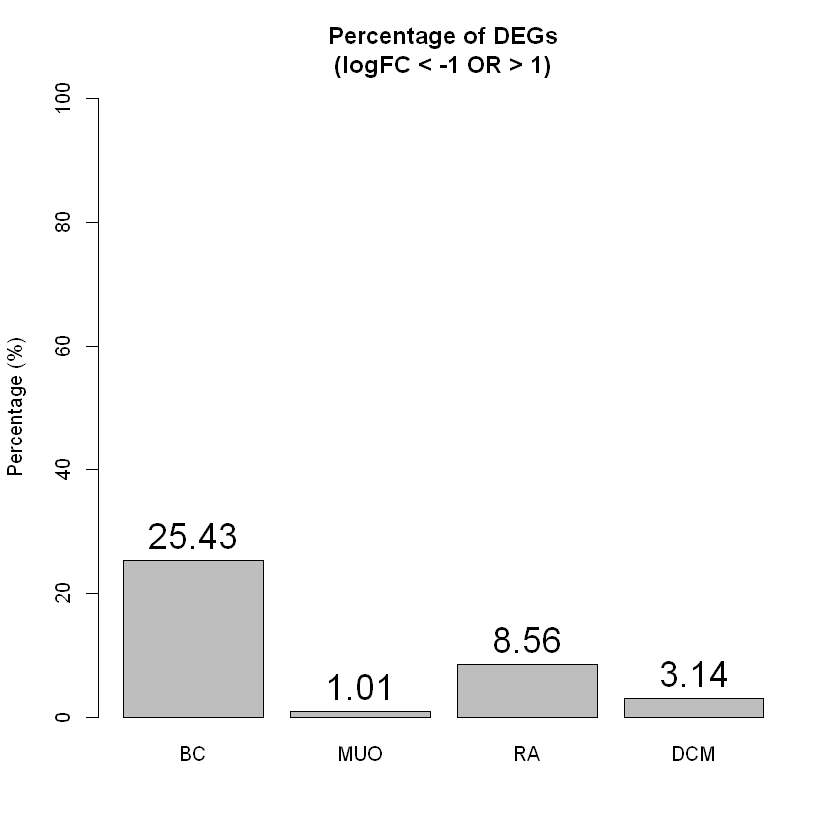

In [31]:
Automation <- function(y,z,p) {

# breast cancer
datBC1 <<- subset(datBC, datBC$logFC_BC <= y)
datBC2 <<- subset(datBC, datBC$logFC_BC >= z)
datBC3 <<- rbind(datBC1, datBC2)
datBC4 <<- subset(datBC3, datBC3$PValue_BC <= p) # data frame with significant differentially expressed genes
nBC <<- nrow(datBC4)
percBC <<- (as.numeric(nBC) / as.numeric(nrow(datBC)) * 100)
percBC <<- as.numeric(format(round(percBC, 2), nsmall = 2))

# metabolically unhealthy obese
datMUO1 <<- subset(datMUO, datMUO$logFC_MUO <= y)
datMUO2 <<- subset(datMUO, datMUO$logFC_MUO >= z)
datMUO3 <<- rbind(datMUO1, datMUO2)
datMUO4 <<- subset(datMUO3, datMUO3$PValue_MUO <= p) # data frame with significant differentially expressed genes
nMUO <<- nrow(datMUO4)
percMUO <<- (as.numeric(nMUO) / as.numeric(nrow(datMUO)) * 100)
percMUO <<- as.numeric(format(round(percMUO, 2), nsmall = 2))

# rheumatoid arthritis
datRA_1 <<- subset(datRA, datRA$logFC_RA <= y)
datRA_2 <<- subset(datRA, datRA$logFC_RA >= z)
datRA_3 <<- rbind(datRA_1, datRA_2)
datRA_4 <<- subset(datRA_3, datRA_3$PValue_RA <= p) # data frame with significant differentially expressed genes
nRA <<- nrow(datRA_4)
percRA <<- (as.numeric(nRA) / as.numeric(nrow(datRA)) * 100)
percRA <<- as.numeric(format(round(percRA, 2), nsmall = 2))

# DCM
datDCM1 <<- subset(datDCM, datDCM$logFC_DCM <= y)
datDCM2 <<- subset(datDCM, datDCM$logFC_DCM >= z)
datDCM3 <<- rbind(datDCM1, datDCM2)
datDCM4 <<- subset(datDCM3, datDCM3$PValue_DCM <= p) # data frame with significant differentially expressed genes
nDCM <<- nrow(datDCM4)
percDCM <<- (as.numeric(nDCM) / as.numeric(nrow(datDCM)) * 100)
percDCM <<- as.numeric(format(round(percDCM, 2), nsmall = 2))


# create data frame from significant differentially expressed genes and percentage of these genes
sigGenes <<- c(nBC, nMUO, nRA, nDCM)
percGenes <<- c(paste0(percBC, "%"), 
              paste0(percMUO, "%"), paste0(percRA, "%"), 
              paste0(percDCM, "%"))
Disease <<- c("Breast cancer", "MUO", "Rheumatoid arthritis", "DCM")
df2 <<- data.frame(Disease, sigGenes, percGenes)
colnames(df2)[c(2,3)] <- c("Significant Genes (n)", "Percentage Significant Genes")

# save data frame as text file
write.table(df2, file.path(getwd(), "Results", "all_genes", paste0(z, "sigGenes.txt")), sep = "\t", row.names = F, quote = F)

# view table
df2
    
# store values of significant up- and downregulated genes as variables to make a barplot out of them
# because we only stored the genes with a log fold change lower than -0.26 or higher than 0.26, we still have to select the significant genes with a p-value lower < 0.05
# we have to store these numbers seperately to create a distinction between to two in the matrix and thus barplot
downBC <- nrow(subset(datBC1, datBC1$PValue_BC <= p))
upBC <- nrow(subset(datBC2, datBC2$PValue_BC <= p))
downMUO <- nrow(subset(datMUO1, datMUO1$PValue_MUO <= p))
upMUO <- nrow(subset(datMUO2, datMUO2$PValue_MUO <= p))
downRA <- nrow(subset(datRA_1, datRA_1$PValue_RA <= p))
upRA <- nrow(subset(datRA_2, datRA_2$PValue_RA <= p))
downDCM <- nrow(subset(datDCM1, datDCM1$PValue_DCM <= p))
upDCM <- nrow(subset(datDCM2, datDCM2$PValue_DCM <= p))

# create matrix before creating barplot
df1 <- matrix(ncol = 4, nrow = 2)
colnames(df1) <- c("BC", "MUO", "RA", "DCM")
df1[1,1] = upBC
df1[2,1] = downBC
df1[1,2] = upMUO
df1[2,2] = downMUO
df1[1,3] = upRA
df1[2,3] = downRA
df1[1,4] = upDCM
df1[2,4] = downDCM

df1

# create barplot
bar_plot <- barplot(df1, beside = TRUE, main = paste0("Number of DEGs 
(logFC < ", y, " OR > ", z, ")"),
                    names.arg = c(colnames(df1)), 
                    ylab = "Number (n)", 
                    ylim = c(0, 8000),
                    col = c("#FF0000", "#0000FF", "#FF0000", "#0000FF", "#FF0000", "#0000FF", "#FF0000",
                            "#0000FF"),
                    legend = c("Upregulated", "Downregulated"),
                    args.legend = list(x = "topright"))
text(bar_plot, df1, df1, cex= 1.35, pos = 3) 

# save barplot as image
dev.copy(svg, filename = file.path(getwd(),"Results", "all_genes", paste0(z, "barplot_nSigGenes.svg")));
dev.off ();

# create barplot of percentage of significant differentially expressed genes
x <- as.numeric(c(percBC, percMUO, percRA, percDCM))
k <- c("BC", "MUO", "RA", "DCM")
bar_plot1 <- barplot(x, main = paste0("Percentage of DEGs
(logFC < ", y, " OR > ", z, ")"),
        names.arg = c(k), ylab = "Percentage (%)",
        ylim = c(0,100))
text(bar_plot1, x, x, cex=1.8, pos = 3)

# save boxplot as image
dev.copy(svg, filename = file.path(getwd(),"Results", "all_genes", paste0(z, "barplot_percSigGenes.svg")));
dev.off ();
    
}

# values are filled in above
Automation(y = negLogFC, z = posLogFC, p = pValue)

It is important to note that these percentages don't represent the perfecentage of significant differentially expressed genes of the _whole genome_. Rather these percentages indicate the significant differentially expressed genes of the _total number of genes measured_ by the respective method used. 

### Amount of similar measured genes
It is also interesting to know how many similar significant differentially expressed genes are measured between two datasets.

In [24]:
# first create an empty data frame
Disease_list <- c("BC", "MUO", "RA",
                  "DCM")
df <- data.frame(matrix(ncol = 5, nrow = 4))
colnames(df)[1] <- "Disease"
colnames(df)[2:5] <- Disease_list
df$Disease <- Disease_list
df

Disease,BC,MUO,RA,DCM
BC,NA,NA,NA,NA
MUO,NA,NA,NA,NA
RA,NA,NA,NA,NA
DCM,NA,NA,NA,NA


In [25]:
# fill in values of data files
df[1,2] = length(datBC4$entrezgene) # breast cancer
df[2,3] = length(datMUO4$entrezgene) # MUO
df[3,4] = length(datRA_4$entrezgene) # RA
df[4,5] = length(datDCM4$entrezgene) # DCM

# breast cancer vs the rest
df[1,3] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datMUO4$entrezgene))$entrezgene) # MUO
df[2,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datMUO4$entrezgene))$entrezgene)

df[1,4] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datRA_4$entrezgene))$entrezgene) # RA
df[3,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datRA_4$entrezgene))$entrezgene)

df[1,5] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datDCM4$entrezgene))$entrezgene) # DCM
df[4,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datDCM4$entrezgene))$entrezgene)

# MUO vs the rest
df[2,4] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datRA_4$entrezgene))$entrezgene) # RA
df[3,3] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datRA_4$entrezgene))$entrezgene)

df[2,5] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datDCM4$entrezgene))$entrezgene) # DCM
df[4,3] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datDCM4$entrezgene))$entrezgene)

# RA235 vs the rest
df[3,5] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datDCM4$entrezgene))$entrezgene) # DCM
df[4,4] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datDCM4$entrezgene))$entrezgene)

# save data frame as text file
write.table(df, file.path(getwd(), "Results", "all_genes", paste0(posLogFC, "n_sigGenes.txt")), sep = "\t", row.names = F, quote = F)

# view table
df

Disease,BC,MUO,RA,DCM
BC,12204,1522,2240,1128
MUO,1522,2119,769,270
RA,2240,769,3313,422
DCM,1128,270,422,1716


In [26]:
# create another empty data frame, just like before
df_perc <- data.frame(matrix(ncol = 5, nrow = 4))
colnames(df_perc)[1] <- "Disease"
colnames(df_perc)[2:5] <- Disease_list
df_perc$Disease <- Disease_list

# fill in the number of significant differntially expressed genes per disease
# fill in values of data files
df_perc[1,2] = length(datBC4$entrezgene) # breast cancer
df_perc[2,3] = length(datMUO4$entrezgene) # MUO
df_perc[3,4] = length(datRA_4$entrezgene) # RA
df_perc[4,5] = length(datDCM4$entrezgene) # DCM

# breast cancer
df_perc[1,3] = round(((df[1,3] / df_perc[1,2]) * 100), 1)
df_perc[1,4] = round(((df[1,4] / df_perc[1,2]) * 100), 1)
df_perc[1,5] = round(((df[1,5] / df_perc[1,2]) * 100), 1)

# MUO
df_perc[2,2] = round(((df[2,2] / df_perc[2,3]) * 100), 1)
df_perc[2,4] = round(((df[2,4] / df_perc[2,3]) * 100), 1)
df_perc[2,5] = round(((df[2,5] / df_perc[2,3]) * 100), 1)

# RA
df_perc[3,2] = round(((df[3,2] / df_perc[3,4]) * 100), 1)
df_perc[3,3] = round(((df[3,3] / df_perc[3,4]) * 100), 1)
df_perc[3,5] = round(((df[3,5] / df_perc[3,4]) * 100), 1)

# DCM
df_perc[4,2] = round(((df[4,2] / df_perc[4,5]) * 100), 1)
df_perc[4,3] = round(((df[4,3] / df_perc[4,5]) * 100), 1)
df_perc[4,4] = round(((df[4,4] / df_perc[4,5]) * 100), 1)

df_perc1 <- df_perc
df_perc1 <- format(df_perc1, digits = 1)
df_perc1

# add percentages, has to go via this way instead of adding it in the lines of code above. 
# While adding it to the lines of code above, errors occur that no numeric values are used in the equation
# breast cancer
df_perc[1,3] = paste(df_perc[1,3],"%")
df_perc[1,4] = paste(df_perc[1,4],"%")
df_perc[1,5] = paste(df_perc[1,5],"%")

# MUO
df_perc[2,2] = paste(df_perc[2,2],"%")
df_perc[2,4] = paste(df_perc[2,4],"%")
df_perc[2,5] = paste(df_perc[2,5],"%")

# RA
df_perc[3,2] = paste(df_perc[3,2],"%")
df_perc[3,3] = paste(df_perc[3,3],"%")
df_perc[3,5] = paste(df_perc[3,5],"%")

# DCM
df_perc[4,2] = paste(df_perc[4,2],"%")
df_perc[4,3] = paste(df_perc[4,3],"%")
df_perc[4,4] = paste(df_perc[4,4],"%")

# save data frame as text file
write.table(df_perc, file.path(getwd(), "Results", "all_genes", paste0(posLogFC, "perc_n_sigGenes.txt")), sep = "\t", row.names = F, quote = F)

df_perc

Disease,BC,MUO,RA,DCM
BC,12204,12,18,9
MUO,72,2119,36,13
RA,68,23,3313,13
DCM,66,16,25,1716


Disease,BC,MUO,RA,DCM
BC,12204,12.5 %,18.4 %,9.2 %
MUO,71.8 %,2119,36.3 %,12.7 %
RA,67.6 %,23.2 %,3313,12.7 %
DCM,65.7 %,15.7 %,24.6 %,1716


In [27]:
# create matrix from data frame and have first column as rownames
rownames(df_perc1) <- df_perc1$Disease
df_perc1 <- df_perc1[-1]

df_perc1 <- as.matrix(as.data.frame(lapply(df_perc1, as.numeric), row.names = Disease_list))

df_perc_matrix <- as.matrix(df_perc1)
df_perc_matrix

,BC,MUO,RA,DCM
BC,12204,12,18,9
MUO,72,2119,36,13
RA,68,23,3313,13
DCM,66,16,25,1716


Warning message in heatmap.2(as.matrix(df_perc_matrix), cellnote = df_perc_matrix, :
"Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram."Warning message in heatmap.2(as.matrix(df_perc_matrix), cellnote = df_perc_matrix, :
"Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram."

svg 
  3

png 
  2

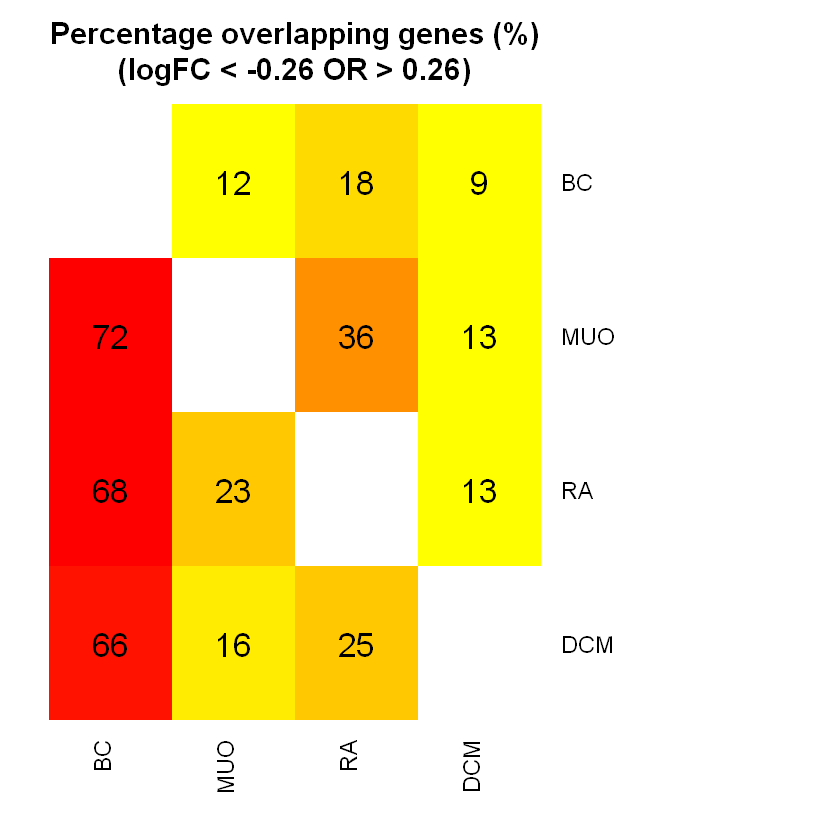

In [28]:
# create color mapping
colfunc <- colorRampPalette(c("yellow", "red"))

# create heatmap
df_perc_matrix[df_perc_matrix >= 100] <- NA

df_perc_hm <- heatmap.2(as.matrix(df_perc_matrix) , cellnote = df_perc_matrix, notecol = "black", 
                     notecex = 2.0, Rowv = NA, Colv = NA, col = colfunc,
                     trace = "none", density.info = "none", key = F,
                     main = paste0("Percentage overlapping genes (%)
(logFC < ", negLogFC, " OR > ", posLogFC, ")"), margin = c(6,15), lhei = c(1,7), lwid = c(1,16) ,cexCol = 1.4, cexRow = 1.4)

# save heatmap as image
dev.copy(svg, filename = file.path(getwd(),"Results", "all_genes", paste0(posLogFC, "heatmap.svg")));
dev.off ();

In [60]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17134)

Matrix products: default

locale:
[1] LC_COLLATE=Dutch_Netherlands.1252  LC_CTYPE=Dutch_Netherlands.1252   
[3] LC_MONETARY=Dutch_Netherlands.1252 LC_NUMERIC=C                      
[5] LC_TIME=Dutch_Netherlands.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2       RColorBrewer_1.1-2   gplots_3.0.1.1      
[4] dplyr_0.7.8          RevoUtils_11.0.1     RevoUtilsMath_11.0.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.0         bindr_0.1.1        magrittr_1.5       tidyselect_0.2.5  
 [5] uuid_0.1-2         R6_2.3.0           rlang_0.3.1        caTools_1.17.1.1  
 [9] tools_3.5.1        KernSmooth_2.23-15 gtools_3.8.1       htmltools_0.3.6   
[13] digest_0.6.18      assertthat_0.2.1   tibble_2.0.1       crayon_1.3.4      
[17] IRdisplay_0.7.0    purrr_0.3.0 